# K-Means

<span>The K-means clustering alogirithms uses a unsupervised algorithm to find cluster/centroids in the data the best represent all the datapoints. You define the "K" number of clusters in the data (1,2,3,etc). The algorthim then randomly placing "k" number of centroids in the data's hyperplane, calculated the distance from each centroid to each datapoint, and then assigning each datapoint in our data to a centroids. THen the centeroid is then moved over to the mean of its datapoints in it's hyperplane. It then repeats this process till again until the datapoints assignments no longer change (convergence).</span>

### Import Preliminaries

In [51]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import modules
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import numpy as np
import pandas as pd 
import sklearn
import seaborn as sns
import warnings

from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

# Set pandas options
pd.set_option('max_columns',1000)
pd.set_option('max_rows',30)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set plotting options
mpl.rcParams['figure.figsize'] = (9.0, 3.0)

# Set warning options
warnings.filterwarnings('ignore');

### Import Data

In [52]:
# Import Data
wine = load_wine()
X, y = wine.data, wine.target

# Train-test split the data
train_x, test_x, train_y, test_y = train_test_split(X,y)

wdf = pd.DataFrame(wine.data, columns=wine['feature_names'])
wdf = pd.concat([wdf, pd.DataFrame(wine.target, columns=['target'])], axis=1)
wdf.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.230,1.710,2.430,15.600,127.000,2.800,3.060,0.280,2.290,5.640,1.040,3.920,1065.000,0
1,13.200,1.780,2.140,11.200,100.000,2.650,2.760,0.260,1.280,4.380,1.050,3.400,1050.000,0
2,13.160,2.360,2.670,18.600,101.000,2.800,3.240,0.300,2.810,5.680,1.030,3.170,1185.000,0
3,14.370,1.950,2.500,16.800,113.000,3.850,3.490,0.240,2.180,7.800,0.860,3.450,1480.000,0
4,13.240,2.590,2.870,21.000,118.000,2.800,2.690,0.390,1.820,4.320,1.040,2.930,735.000,0


### Ground Truth

In [69]:
# Target clases
train_y

array([2, 0, 0, 2, 2, 2, 1, 2, 0, 1, 2, 2, 1, 0, 1, 0, 1, 1, 1, 2, 2, 0,
       0, 0, 1, 1, 2, 0, 1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 1, 2, 2, 0, 1, 1,
       0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 0, 2, 2, 0, 0, 1, 2, 1,
       2, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 1, 1, 0, 2, 0, 0, 1, 0, 2,
       1, 2, 0, 2, 2, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2,
       0, 2, 0, 2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 2, 2, 1, 2, 1,
       0])

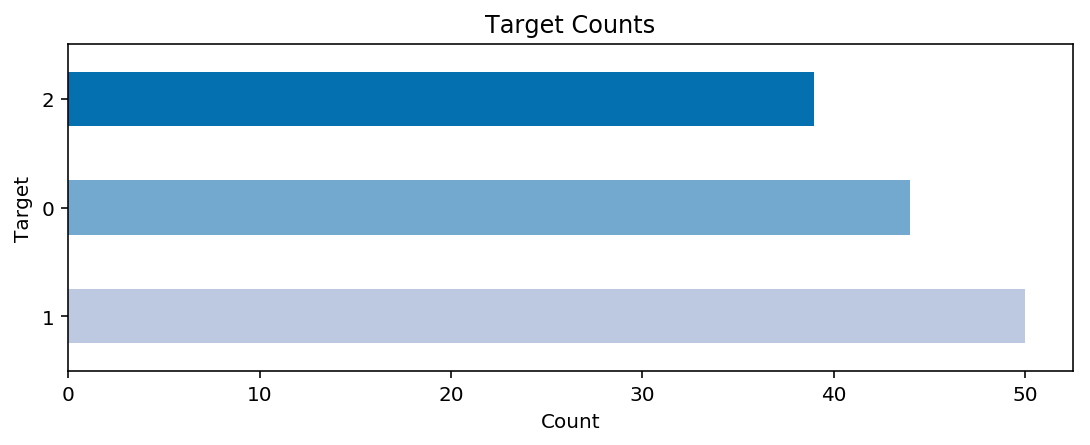

In [70]:
# Plot Target Counts 
target_counts = pd.Series(train_y).value_counts()
target_counts.plot.barh(colors=['#bdc9e1','#74a9cf','#0570b0']);
plt.title('Target Counts')
plt.xlabel('Count')
plt.ylabel('Target');

### Fit the Model

In [71]:
# Fit the model
kmeans = KMeans(n_clusters=3, n_jobs=-1, n_init=20)
kmeans.fit(train_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=20, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Clusters

In [72]:
#View training predictions
pred_train_y = kmeans.predict(train_x)
pred_train_y

array([0, 1, 1, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 2, 2, 0, 1,
       0, 0, 2, 2, 2, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 0, 2, 0, 2, 1, 0, 2,
       1, 0, 1, 2, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0,
       2, 1, 2, 2, 0, 1, 1, 2, 2, 1, 0, 0, 0, 2, 2, 1, 0, 1, 1, 2, 0, 0,
       2, 0, 1, 2, 2, 0, 0, 1, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2, 2, 0, 2,
       1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2,
       1], dtype=int32)

In [73]:
# predic the testing data
pred_test_y = kmeans.predict(test_x)

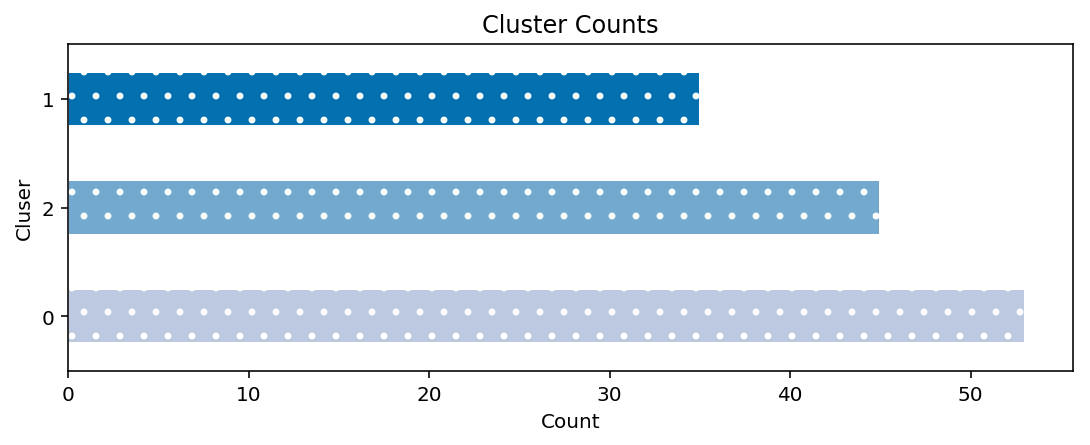

In [89]:
# Plot Cluster Counts 
target_counts = pd.Series(pred_train_y).value_counts()
target_counts.plot.barh(colors=['#bdc9e1','#74a9cf','#0570b0'], 
                        edgecolor='white',hatch='.');
plt.title('Cluster Counts')
plt.xlabel('Count')
plt.ylabel('Cluser');

### Adjusted Rand Score

In [44]:
from sklearn.metrics import adjusted_rand_score
print('Training AR Score:', adjusted_rand_score(train_y, pred_train_y))
print('Testing AR Score:', adjusted_rand_score(test_y, pred_test_y))

Training AR Score: 0.36446469248291574
Testing AR Score: 0.38469536286130174


### Normalized Mutual Info Score

In [45]:
from sklearn.metrics.cluster import normalized_mutual_info_score
print('Training NMI Score:', normalized_mutual_info_score(train_y, pred_train_y))
print('Testing NMI Score:', normalized_mutual_info_score(test_y, pred_test_y))

Training NMI Score: 0.42515420886517824
Testing NMI Score: 0.4561723379740074


### General Notes

- Is the simplest and most common used clustering alogrithms
- K-means will cluster every dataopints in the dataest, the algorithim does not support noiss
- Boundaries between clusters are exactly in the middele bteween the cluster centers
- One downside is that the algorithm uses random initialization so results may vary by the random seed.
- By default sklearn runs the algorithm 10 times with 10 different initialization

Author: Kavi Sekhon